In [18]:
import os
import sklearn
import sklearn.datasets
import sklearn.ensemble
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import matplotlib
from omnixai.data.tabular import Tabular

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
train = pd.read_csv('../data/current-dataset/train-feature-customsplit.csv', delimiter=",",index_col=0)
test = pd.read_csv('../data/current-dataset/test-feature-customsplit.csv', delimiter=",",index_col=0)

In [3]:
X_train = train.drop(columns='label')
y_train = train['label']
X_test = test.drop(columns='label')
y_test = test['label']

In [4]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from keras.utils import to_categorical

feature_names = list(X_train.columns)
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(train.label.copy())
class_names = label_encoder.classes_

In [5]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
dt_clf = DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 2,random_state=42)
dt_clf.fit(X_train, y_train)

# Predict on the test data and evaluate the model
y_pred = dt_clf.predict(X_test)

print(classification_report(y_pred, y_test))

c:\Users\miquel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\miquel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

        Bike       0.00      0.00      0.00         0
         Bus       0.78      0.66      0.71      4895
         Car       0.87      0.75      0.81      4606
       Metro       0.82      0.46      0.59      6827
        Moto       0.00      0.00      0.00         0
         Run       0.92      0.97      0.95       682
  Stationary       0.60      0.95      0.74       773
       Train       0.00      0.00      0.00         0
        Tram       0.00      0.00      0.00         0
        Walk       0.90      0.61      0.73      4039
      e-Bike       0.00      0.00      0.00         0
   e-Scooter       0.00      0.00      0.00         0

    accuracy                           0.63     21822
   macro avg       0.41      0.37      0.38     21822
weighted avg       0.83      0.63      0.71     21822



c:\Users\miquel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


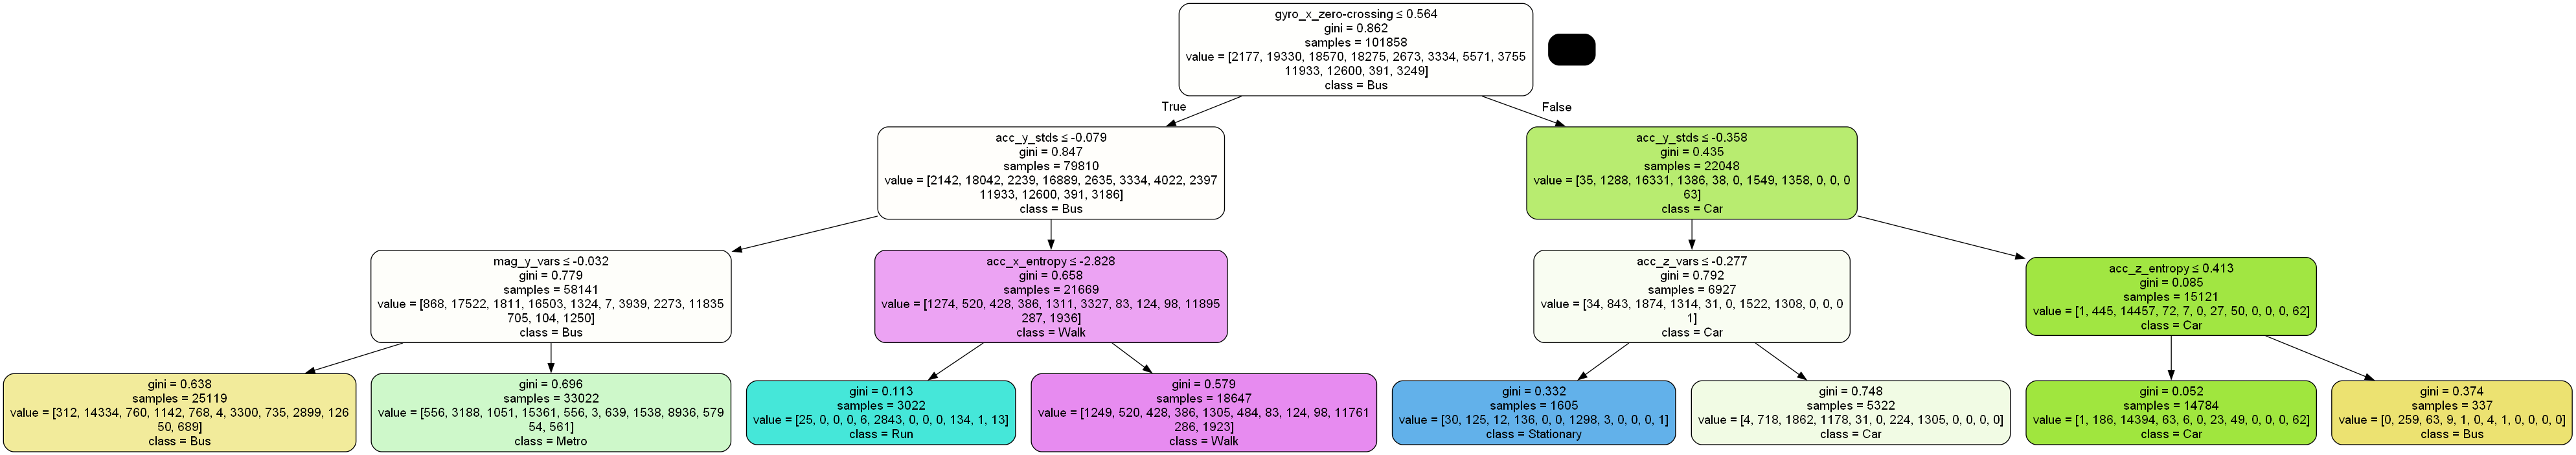

In [6]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(dt_clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_names,class_names=class_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('simple-decisiontree.png')
Image(graph.create_png())

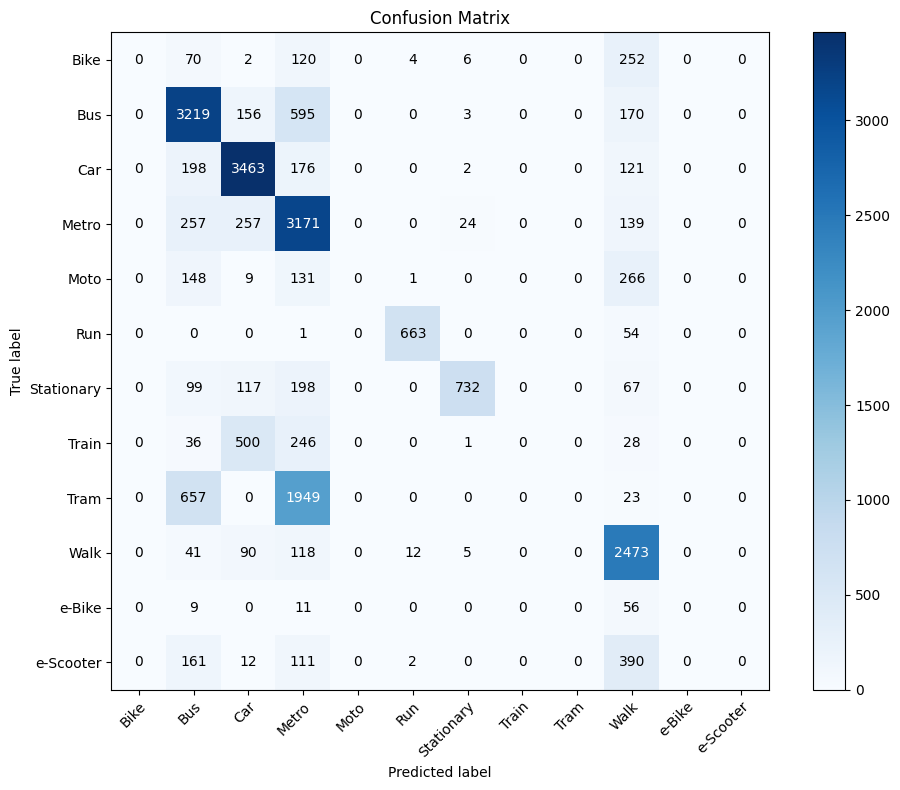

In [7]:
import sys  
sys.path.insert(0, '../src/')
import metrics as mt
mt.plot_confusion_matrix(y_test,y_pred)

In [31]:
from sklearn.model_selection import RandomizedSearchCV
params = {
    'max_depth': range(2,20),
    'min_samples_leaf': [5, 10, 20, 50, 100, 250, 500],
    'min_samples_split': [5, 10, 20, 50, 100, 250, 500],
    'criterion': ["gini", "entropy"],
    'max_features': [1,2,5,10,20]
}
dt = DecisionTreeClassifier(random_state=42)
random_search = RandomizedSearchCV(dt, param_distributions=params, n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=-1)
random_search.fit(X_train,y_train)
# Best parameters and model
best_dt = random_search.best_estimator_
print(random_search.best_params_)

y_predi = best_dt.predict(X_test)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'min_samples_split': 500, 'min_samples_leaf': 250, 'max_features': 20, 'max_depth': 17, 'criterion': 'entropy'}


In [32]:

print(classification_report(y_predi, y_test))
dot_data = StringIO()
export_graphviz(best_dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_names,class_names=class_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('complex-decisiontree.png')

c:\Users\miquel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\miquel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\miquel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

              precision    recall  f1-score   support

        Bike       0.08      0.21      0.12       177
         Bus       0.73      0.72      0.72      4227
         Car       0.88      0.88      0.88      3952
       Metro       0.79      0.69      0.74      4407
        Moto       0.45      0.44      0.45       567
         Run       0.95      0.96      0.96       712
  Stationary       0.70      0.68      0.69      1243
       Train       0.11      0.64      0.19       143
        Tram       0.72      0.69      0.71      2728
        Walk       0.88      0.77      0.82      3104
      e-Bike       0.00      0.00      0.00         0
   e-Scooter       0.38      0.46      0.41       562

    accuracy                           0.73     21822
   macro avg       0.56      0.60      0.56     21822
weighted avg       0.77      0.73      0.75     21822

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.695026 to fit



True

In [33]:
Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.695026 to fit



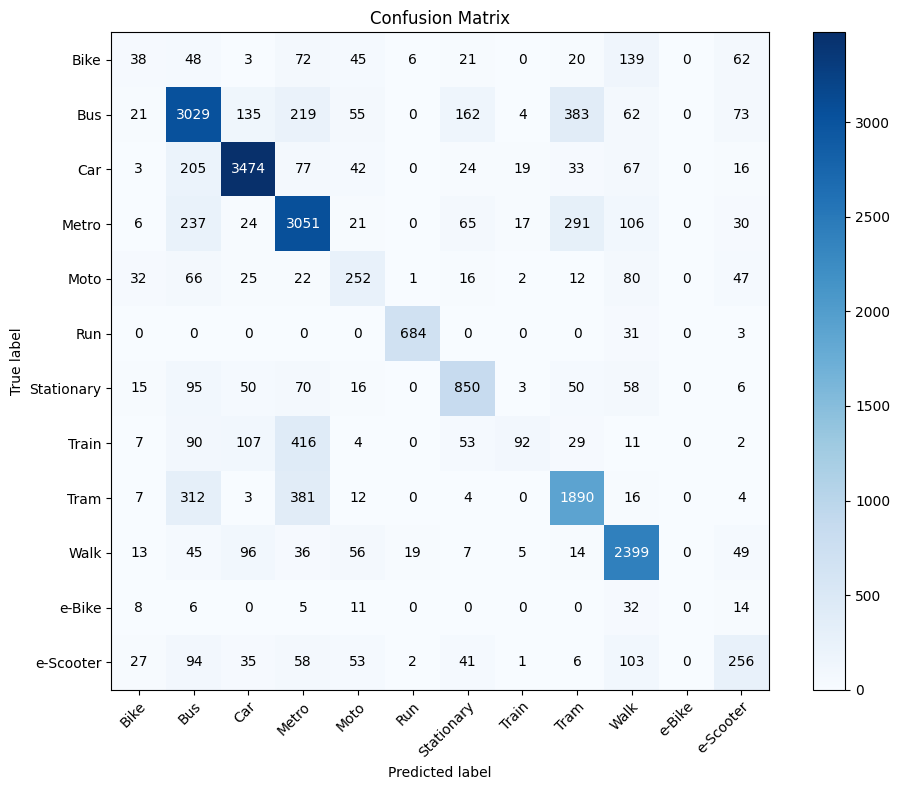

In [34]:
import sys  
sys.path.insert(0, '../src/')
import metrics as mt
mt.plot_confusion_matrix(y_test,y_predi)